#1. Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls -al '/gdrive/My Drive/data'

total 2193336
-rw------- 1 root root    337847 Feb  2 11:56 data_202001.csv
-rw------- 1 root root    314682 Feb  2 10:30 data_202002.csv
-rw------- 1 root root    335953 Feb  2 10:35 data_202003.csv
-rw------- 1 root root    988308 Feb  2 11:58 data_2020.csv
-rw------- 1 root root   9453240 Aug  7  2019 marathon_2015_2017.csv
-rw------- 1 root root   4228123 Apr 29  2017 marathon_results_2015.csv
-rw------- 1 root root   4244383 Apr 29  2017 marathon_results_2016.csv
-rw------- 1 root root   4196246 Apr 29  2017 marathon_results_2017.csv
-rw------- 1 root root 783889122 Jan 30 17:16 TCS_영업소간통행시간_1시간_1개월_202001
-rw------- 1 root root 699429059 Jan 31 06:59 TCS_영업소간통행시간_1시간_1개월_202002
-rw------- 1 root root 738556069 Jan 31 06:59 TCS_영업소간통행시간_1시간_1개월_202003


#2. Korean Characters

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,770 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146442 files and d

런타임 - 런타임 다시 시작

matplotlib의 폰트를 Nanum 폰트로 지정

In [1]:
# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', family='NanumBarunGothic') 

#3. Load Data

In [3]:
import pandas as pd

In [4]:
# Load a file under "data" folder
file = "/gdrive/My Drive/data/data_2020.csv"
data = pd.read_csv(file)

In [7]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37356 entries, 0 to 37355
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   집계일자     37356 non-null  int64
 1   집계시      37356 non-null  int64
 2   출발영업소코드  37356 non-null  int64
 3   도착영업소코드  37356 non-null  int64
 4   통행시간     37356 non-null  int64
 5   요일       37356 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


#4. 집계시

In [9]:
data_06_22 = data[data['집계시'].isin(range(6, 23))]

In [10]:
data_06_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
25164,20200302,6,101,110,2772,0
22064,20200213,6,101,130,8044,3
12199,20200130,6,101,115,6542,3
6518,20200117,6,101,105,806,4
28006,20200309,6,101,115,7670,0
...,...,...,...,...,...,...
15006,20200207,22,101,105,991,4
16139,20200209,22,101,130,9075,6
28346,20200310,22,101,115,4747,1
16141,20200209,22,101,130,7947,6


In [11]:
data_06_22_counting = data_06_22['집계시'].value_counts()

In [12]:
data_06_22_counting

14    1766
12    1758
15    1755
13    1754
11    1744
10    1725
16    1724
17    1719
9     1703
18    1666
8     1662
19    1628
20    1611
7     1585
21    1559
22    1505
6     1440
Name: 집계시, dtype: int64

In [13]:
data_06_22_counting_sorted = data_06_22_counting.sort_index()

In [14]:
data_06_22_counting_sorted

6     1440
7     1585
8     1662
9     1703
10    1725
11    1744
12    1758
13    1754
14    1766
15    1755
16    1724
17    1719
18    1666
19    1628
20    1611
21    1559
22    1505
Name: 집계시, dtype: int64

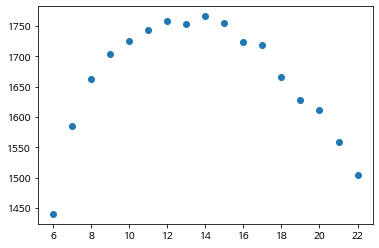

In [15]:
plt.scatter(data_06_22_counting_sorted.index, data_06_22_counting_sorted.values)

In [16]:
data_06_22

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
10,20200101,10,101,105,686,2
11,20200101,10,101,105,761,2
12,20200101,10,101,105,704,2
13,20200101,10,101,105,807,2
14,20200101,10,101,105,687,2
...,...,...,...,...,...,...
37348,20200331,6,101,115,6938,1
37349,20200331,17,101,135,12477,1
37351,20200331,10,101,105,885,1
37352,20200331,8,101,140,13403,1


In [17]:
data_06_22_time = data_06_22['통행시간']

In [18]:
data_06_22_time

10         686
11         761
12         704
13         807
14         687
         ...  
37348     6938
37349    12477
37351      885
37352    13403
37354     3598
Name: 통행시간, Length: 28304, dtype: int64

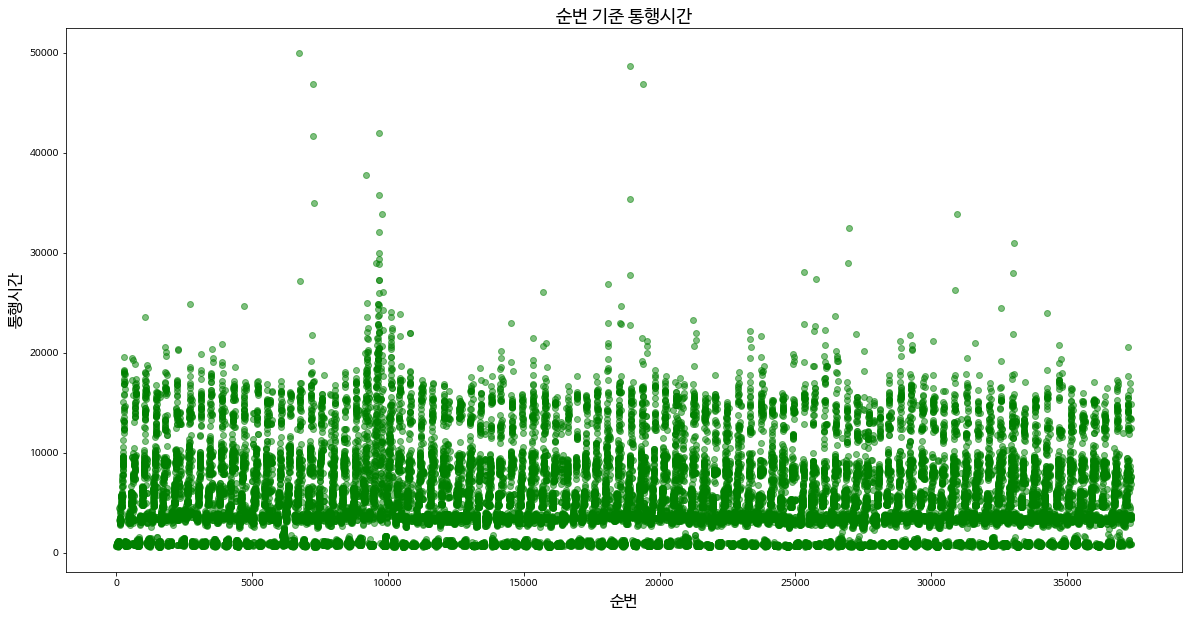

In [19]:
# Configure figure size
plt.figure(figsize=(20,10))
# Creae scatter Chart
plt.scatter(data_06_22_time.index, data_06_22_time.values, c="g", alpha=0.5)
# Generate labels and title
plt.title("순번 기준 통행시간",fontsize=18)
plt.xlabel('순번', fontdict= {'size':16})
plt.ylabel('통행시간', fontdict= {'size':16})
# Show plot
plt.show()

In [20]:
# Store index of data_06_22_counting into x
x = data_06_22_counting_sorted.index

In [21]:
labels = [str(i)+'시' for i in x]

In [22]:
labels

['6시',
 '7시',
 '8시',
 '9시',
 '10시',
 '11시',
 '12시',
 '13시',
 '14시',
 '15시',
 '16시',
 '17시',
 '18시',
 '19시',
 '20시',
 '21시',
 '22시']

In [23]:
values = data_06_22_counting_sorted.values

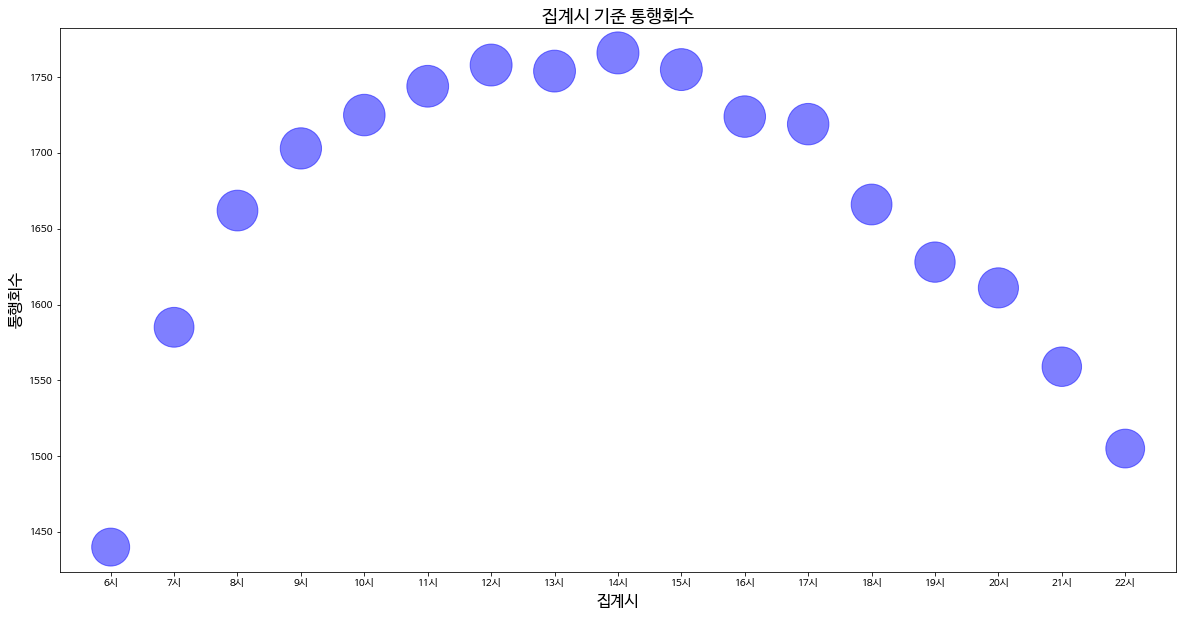

In [26]:
# Configure figure size
plt.figure(figsize=(20,10))
# Creae bubble Chart
plt.scatter(labels, values, s=values, c="b", alpha=0.5)
# Generate labels and title
plt.title("집계시 기준 통행회수",fontsize=18)
plt.xlabel('집계시', fontdict= {'size':16})
plt.ylabel('통행회수', fontdict= {'size':16})
# Show plot
plt.show()

#5. 도착영업소코드

In [27]:
data_destination_counting = data['도착영업소코드'].value_counts()

In [28]:
data_destination_counting

105    12274
110     9419
115     6509
140     2235
130     1972
135     1759
125     1677
120     1511
Name: 도착영업소코드, dtype: int64

In [29]:
data_destination_counting_sorted = data_destination_counting.sort_index()

In [30]:
data_destination_counting_sorted

105    12274
110     9419
115     6509
120     1511
125     1677
130     1972
135     1759
140     2235
Name: 도착영업소코드, dtype: int64

In [31]:
x = data_destination_counting_sorted.index

In [32]:
labels = [str(i) for i in x]

In [33]:
labels

['105', '110', '115', '120', '125', '130', '135', '140']

In [34]:
#101,서울 105,기흥 110,목천 115,대전 120,황간 125,남구미 130,동김천 135,경주 140,부산
labels = ['기흥', '목천', '대전', '황간', '남구미', '동김천', '경주', '부산']

In [35]:
# Store values of data_destination_counting into values
values = data_destination_counting_sorted.values

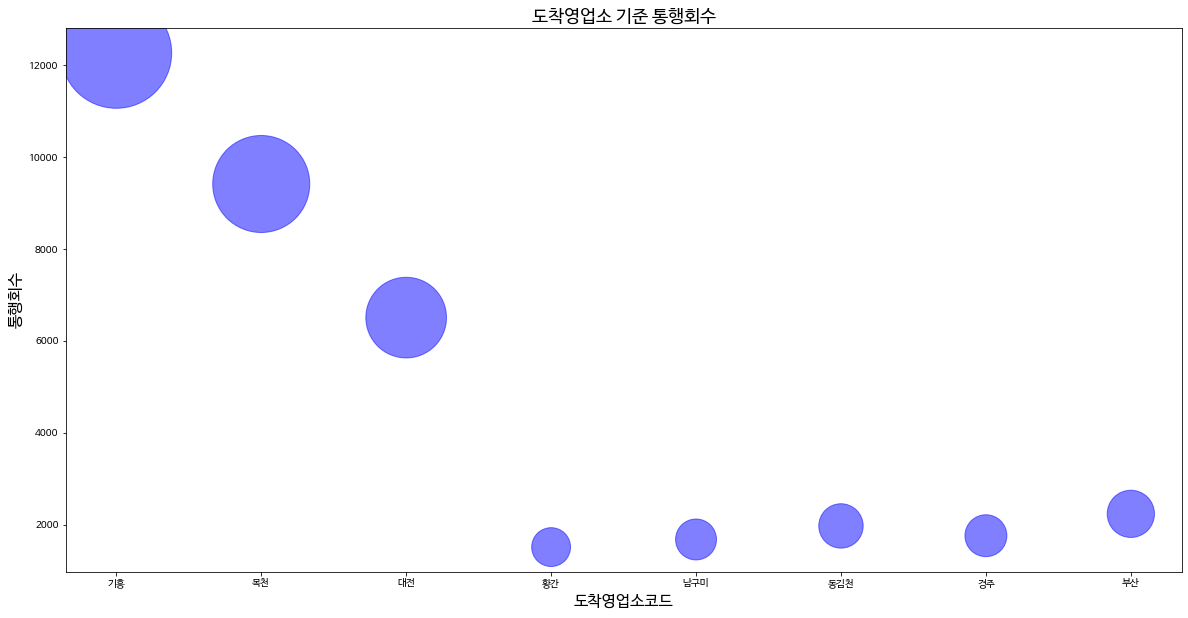

In [36]:
# Configure figure size
plt.figure(figsize=(20,10))
# Creae bubble Chart
plt.scatter(labels, values, s=values, c="b", alpha=0.5)
# Generate labels and title
plt.title("도착영업소 기준 통행회수",fontsize=18)
plt.xlabel('도착영업소코드', fontdict= {'size':16})
plt.ylabel('통행회수', fontdict= {'size':16})
# Show plot
plt.show()

#6. 요일

In [37]:
data_weekdays_mean = data.groupby(by=['요일']).mean()
data_weekdays_count = data.groupby(by=['요일']).count()

In [41]:
data_weekdays_count

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간
요일,,,,,
0,5648,5648,5648,5648,5648
1,5374,5374,5374,5374,5374
2,5430,5430,5430,5430,5430
3,5463,5463,5463,5463,5463
4,5464,5464,5464,5464,5464
5,5212,5212,5212,5212,5212
6,4765,4765,4765,4765,4765


In [42]:
data_weekdays_mean_time = data_weekdays_mean['통행시간']
data_weekdays_count_time = data_weekdays_count['통행시간']

In [44]:
data_weekdays_count_time

요일
0    5648
1    5374
2    5430
3    5463
4    5464
5    5212
6    4765
Name: 통행시간, dtype: int64

In [45]:
x = data_weekdays_mean_time.index

In [46]:
labels = ['월', '화', '수', '목', '금', '토', '일']

In [47]:
values = data_weekdays_mean_time.values

In [49]:
counts = data_weekdays_count_time.values

In [50]:
counts

array([5648, 5374, 5430, 5463, 5464, 5212, 4765])

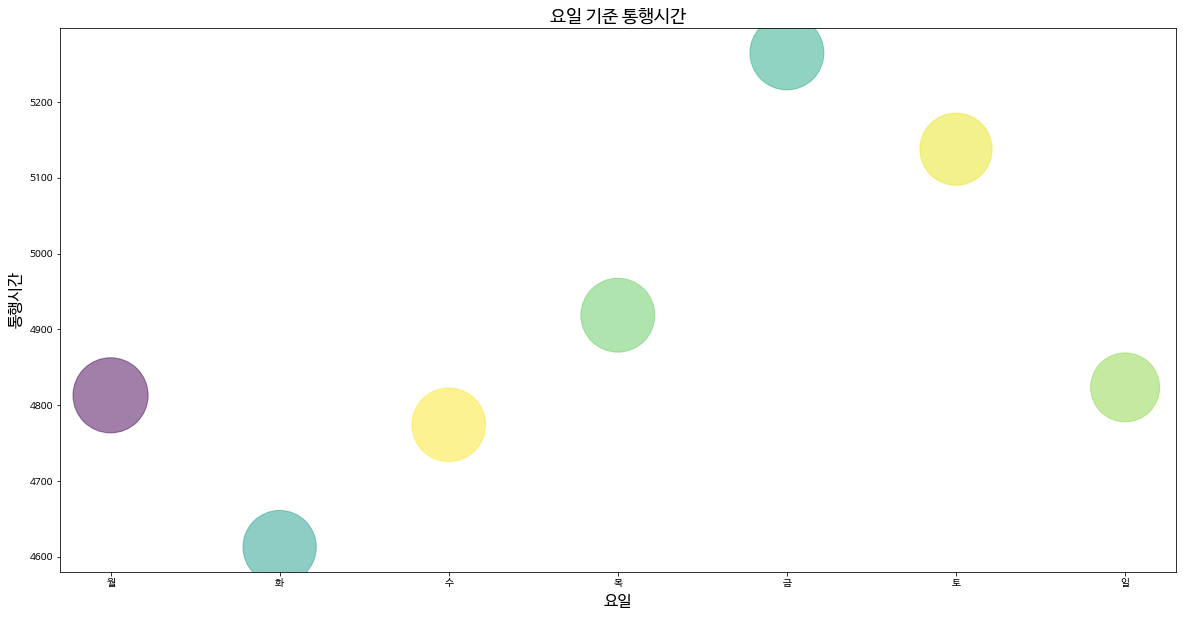

In [51]:
import numpy as np

colors = np.random.rand(len(labels))
# Configure figure size
plt.figure(figsize=(20,10))
# Creae bubble Chart
plt.scatter(labels, values, s=counts, c=colors, alpha=0.5)
# Generate labels and title
plt.title("요일 기준 통행시간",fontsize=18)
plt.xlabel('요일', fontdict= {'size':16})
plt.ylabel('통행시간', fontdict= {'size':16})
# Show plot
plt.show()

#OLD-5. 집계일자

In [52]:
data_days = data.groupby(by=['집계일자']).mean()

In [53]:
data_days

,집계시,출발영업소코드,도착영업소코드,통행시간,요일
집계일자,,,,,
20200101,12.070707,101.0,114.785354,5241.186869,2.0
20200102,12.179245,101.0,113.985849,4776.393868,3.0
20200103,11.780702,101.0,115.230263,5351.916667,4.0
20200104,11.694030,101.0,114.838308,5206.171642,5.0
20200105,12.508333,101.0,115.263889,5266.744444,6.0
...,...,...,...,...,...
20200327,12.363409,101.0,113.771930,4584.248120,4.0
20200328,11.332506,101.0,114.540943,4858.759305,5.0
20200329,12.288312,101.0,114.779221,4668.493506,6.0


In [54]:
data_days_time = data_days['통행시간']

In [55]:
data_days_time

집계일자
20200101    5241.186869
20200102    4776.393868
20200103    5351.916667
20200104    5206.171642
20200105    5266.744444
               ...     
20200327    4584.248120
20200328    4858.759305
20200329    4668.493506
20200330    4644.770833
20200331    4409.579710
Name: 통행시간, Length: 91, dtype: float64

In [56]:
x = data_days_time.index

In [57]:
labels = [str(i) for i in x]

In [58]:
labels

['20200101',
 '20200102',
 '20200103',
 '20200104',
 '20200105',
 '20200106',
 '20200107',
 '20200108',
 '20200109',
 '20200110',
 '20200111',
 '20200112',
 '20200113',
 '20200114',
 '20200115',
 '20200116',
 '20200117',
 '20200118',
 '20200119',
 '20200120',
 '20200121',
 '20200122',
 '20200123',
 '20200124',
 '20200125',
 '20200126',
 '20200127',
 '20200128',
 '20200129',
 '20200130',
 '20200131',
 '20200201',
 '20200202',
 '20200203',
 '20200204',
 '20200205',
 '20200206',
 '20200207',
 '20200208',
 '20200209',
 '20200210',
 '20200211',
 '20200212',
 '20200213',
 '20200214',
 '20200215',
 '20200216',
 '20200217',
 '20200218',
 '20200219',
 '20200220',
 '20200221',
 '20200222',
 '20200223',
 '20200224',
 '20200225',
 '20200226',
 '20200227',
 '20200228',
 '20200229',
 '20200301',
 '20200302',
 '20200303',
 '20200304',
 '20200305',
 '20200306',
 '20200307',
 '20200308',
 '20200309',
 '20200310',
 '20200311',
 '20200312',
 '20200313',
 '20200314',
 '20200315',
 '20200316',
 '20200317',

In [59]:
# Store values of data_days_time into values
values = data_days_time.values

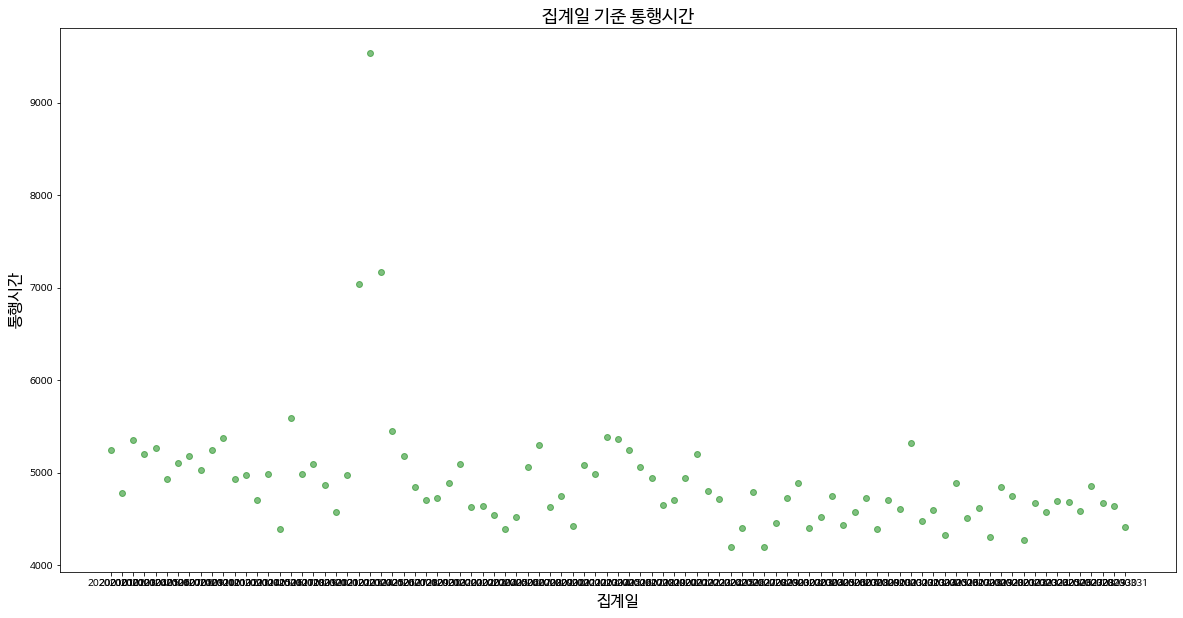

In [60]:
# Configure figure size
plt.figure(figsize=(20,10))
# Creae scatter Chart
plt.scatter(labels, values, c="g", alpha=0.5)
# Generate labels and title
plt.title("집계일 기준 통행시간",fontsize=18)
plt.xlabel('집계일', fontdict= {'size':16})
plt.ylabel('통행시간', fontdict= {'size':16})
# Show plot
plt.show()

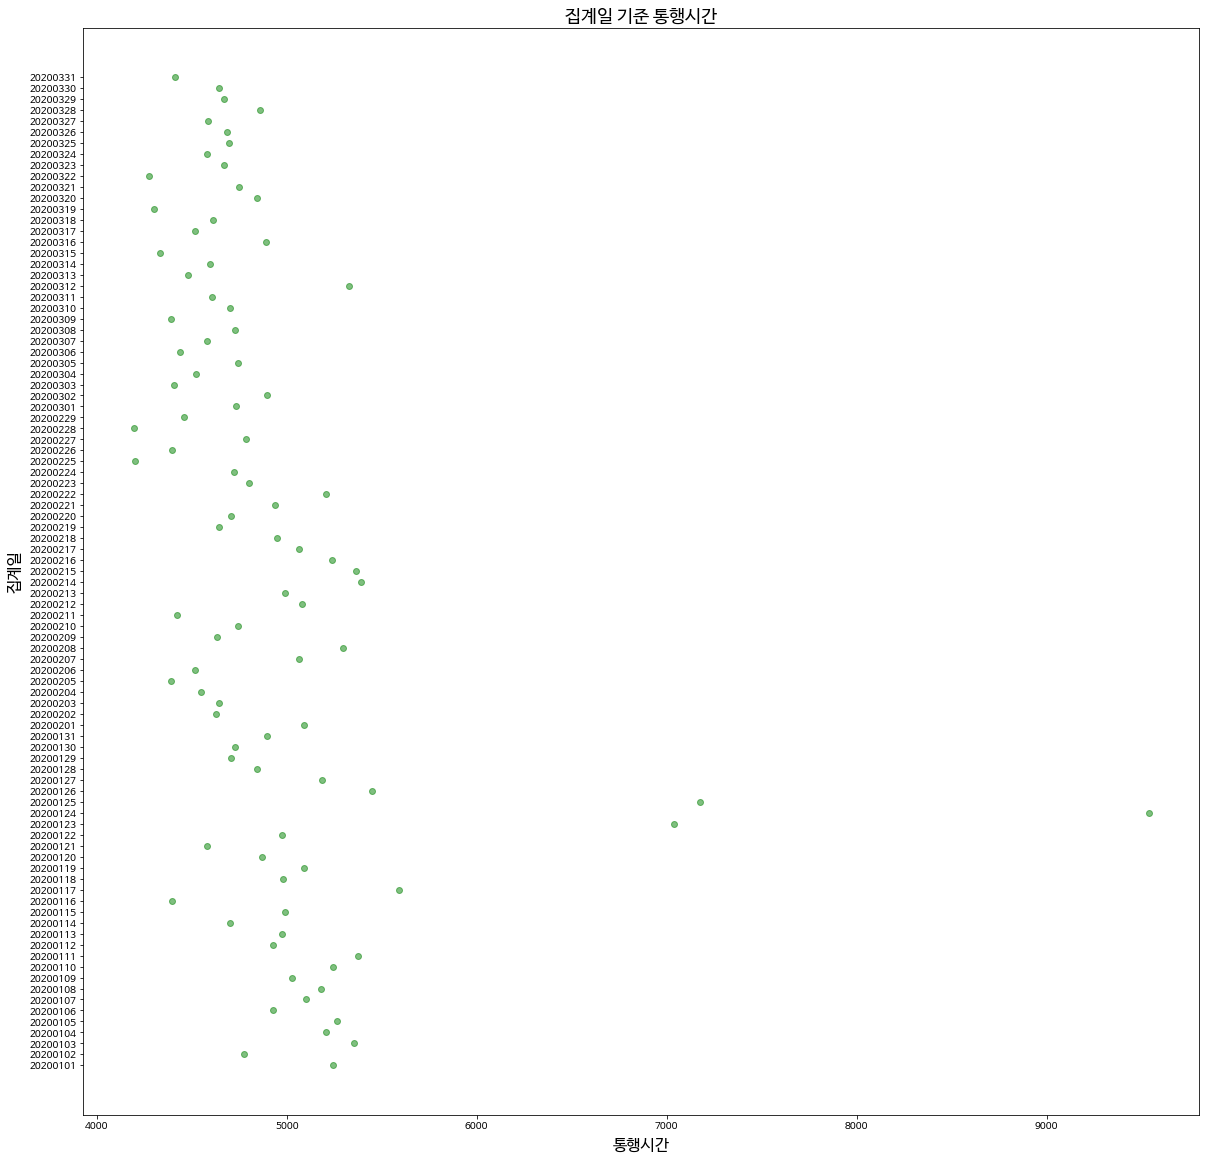

In [61]:
# Configure figure size
plt.figure(figsize=(20,20))
# Creae pie Chart
plt.scatter(values, labels, c="g", alpha=0.5)
# Generate labels and title
plt.title("집계일 기준 통행시간",fontsize=18)
plt.xlabel('통행시간', fontdict= {'size':16})
plt.ylabel('집계일', fontdict= {'size':16})
# Show plot
plt.show()

In [62]:
#101,서울 105,기흥 110,목천 115,대전 120,황간 125,남구미 130,동김천 135,경주 140,부산
data_110_days = data[data['도착영업소코드'] == 110].groupby(by=['집계일자']).mean()
data_125_days = data[data['도착영업소코드'] == 125].groupby(by=['집계일자']).mean()
data_140_days = data[data['도착영업소코드'] == 140].groupby(by=['집계일자']).mean()

In [63]:
data_110_days_time = data_110_days['통행시간']
data_125_days_time = data_125_days['통행시간']
data_140_days_time = data_140_days['통행시간']

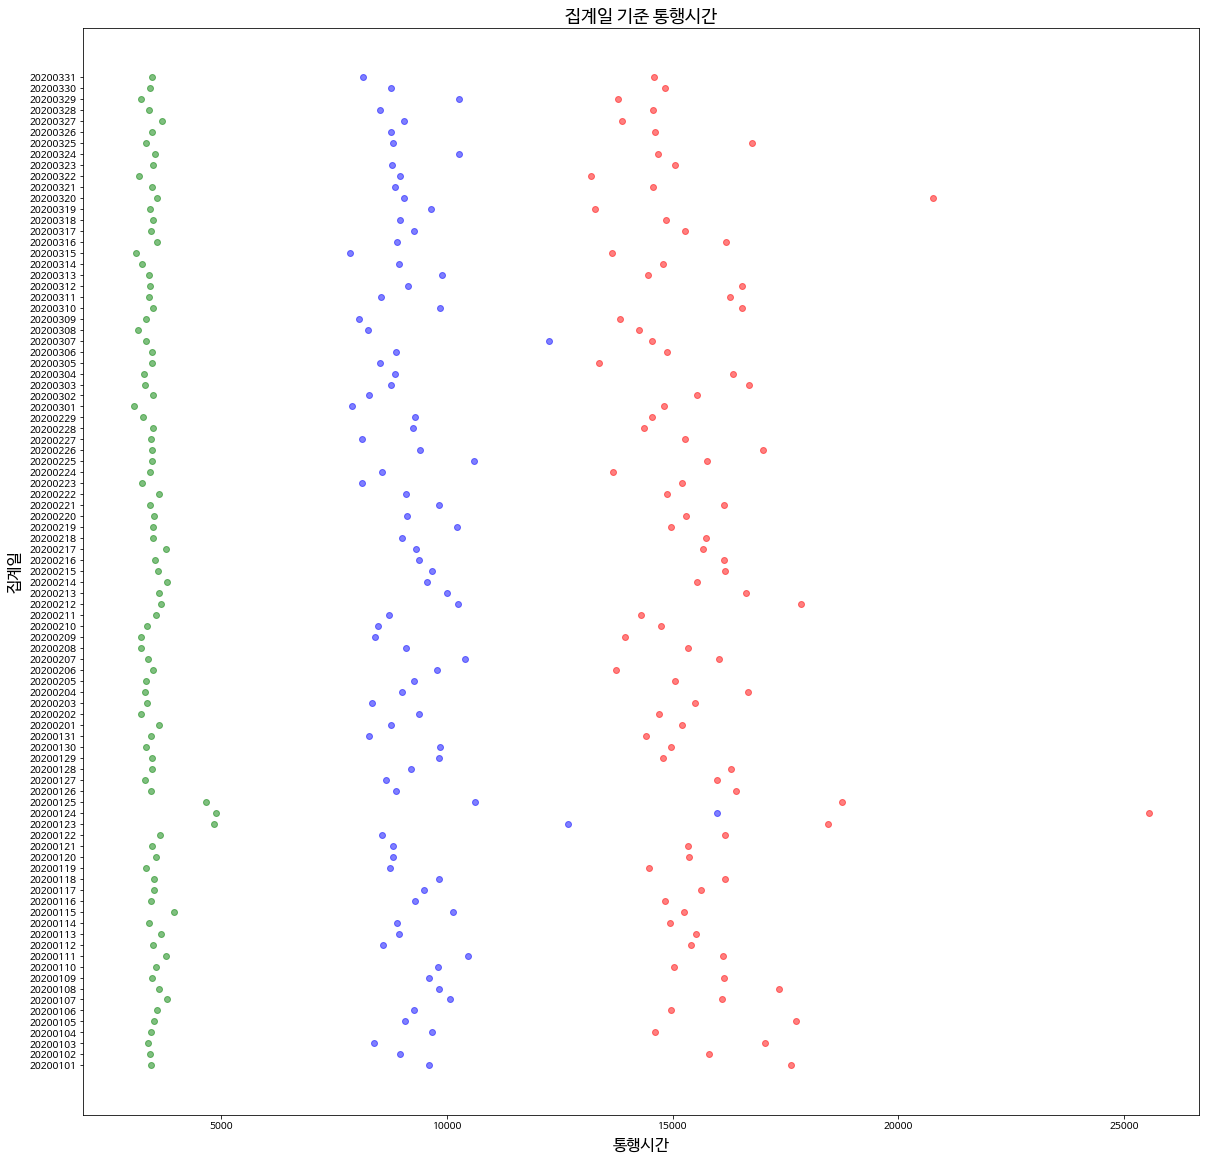

In [64]:
# Configure figure size
plt.figure(figsize=(20,20))
# Creae pie Chart
plt.scatter(data_110_days_time.values, labels, c="g", alpha=0.5)
plt.scatter(data_125_days_time.values, labels, c="b", alpha=0.5)
plt.scatter(data_140_days_time.values, labels, c="r", alpha=0.5)
# Generate labels and title
plt.title("집계일 기준 통행시간",fontsize=18)
plt.xlabel('통행시간', fontdict= {'size':16})
plt.ylabel('집계일', fontdict= {'size':16})
# Show plot
plt.show()